# importing dependencies

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('drive/MyDrive/content/train.csv')

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
print(df)

        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi se

In [46]:
df.head(7)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [47]:
df.shape

(103904, 25)

In [48]:
#count the number of empty values in each column
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [49]:
#drop the column with all missing values
df = df.dropna(axis=1)

In [50]:
df.shape

(103904, 24)

In [51]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [52]:
#get a count of the number of satified and neutral or dissatisfied
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


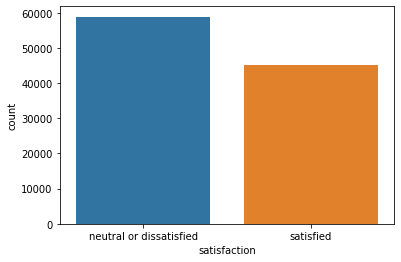

In [53]:
#visualize the count 
sns.countplot(df['satisfaction'], label= 'count')

In [54]:
#look at the data types to see which columns need to be encoded
df.dtypes

Unnamed: 0                            int64
id                                    int64
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes      

In [55]:
#encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,2] = labelencoder_Y.fit_transform(df.iloc[:,2].values)
df.iloc[:,3] = labelencoder_Y.fit_transform(df.iloc[:,3].values)
df.iloc[:,5] = labelencoder_Y.fit_transform(df.iloc[:,5].values)
df.iloc[:,6] = labelencoder_Y.fit_transform(df.iloc[:,6].values)
df.iloc[:,23] = labelencoder_Y.fit_transform(df.iloc[:,23].values)

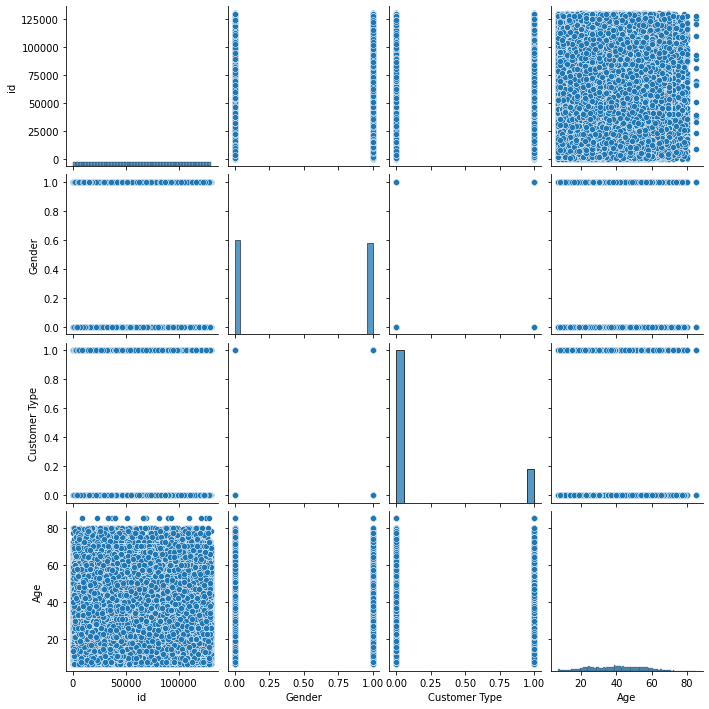

In [56]:
sns.pairplot(df.iloc[:,1:5])

In [57]:
df.dtypes

Unnamed: 0                           int64
id                                   int64
Gender                               int64
Customer Type                        int64
Age                                  int64
Type of Travel                       int64
Class                                int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
satisfactio

In [58]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,5,4,3,4,4,5,5,25,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,1,5,3,1,4,1,1,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,5,4,3,4,4,4,5,0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,2,5,3,1,4,2,11,0
4,4,119299,1,0,61,0,0,214,3,3,...,5,3,3,4,4,3,3,3,0,1


In [59]:
#get the correlation of the columns 
df.iloc[:, 1:24].corr()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
id,1.000000,-0.000606,0.000145,0.022857,0.000475,-0.104338,0.095544,-0.021276,-0.002110,0.014163,...,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,0.013734
Gender,-0.000606,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,...,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.012211
Customer Type,0.000145,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,...,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,-0.187638
Age,0.022857,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,...,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,0.137167
Type of Travel,0.000475,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,...,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.449000
Class,-0.104338,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,...,-0.210158,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,-0.449321
Flight Distance,0.095544,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,...,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,0.298780
Inflight wifi service,-0.021276,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,...,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,0.284245
Departure/Arrival time convenient,-0.002110,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,...,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.051601
Ease of Online booking,0.014163,0.006951,-0.019509,0.024842,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,...,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,0.171705


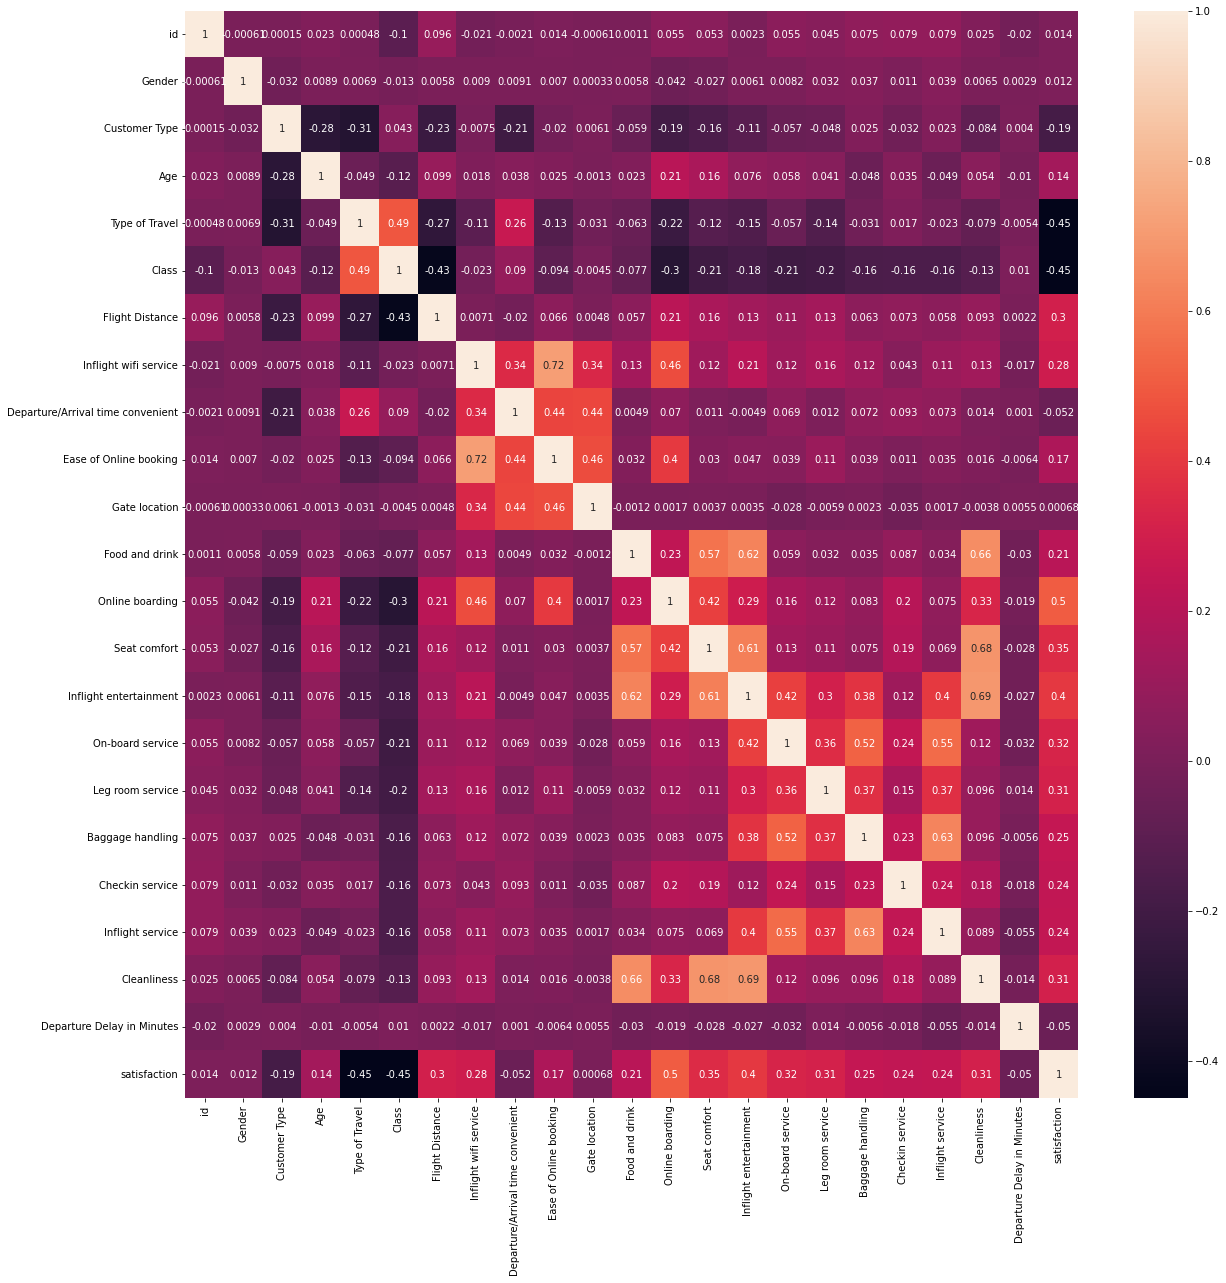

In [60]:
#visualise the corelation
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,1:24].corr(), annot= True)

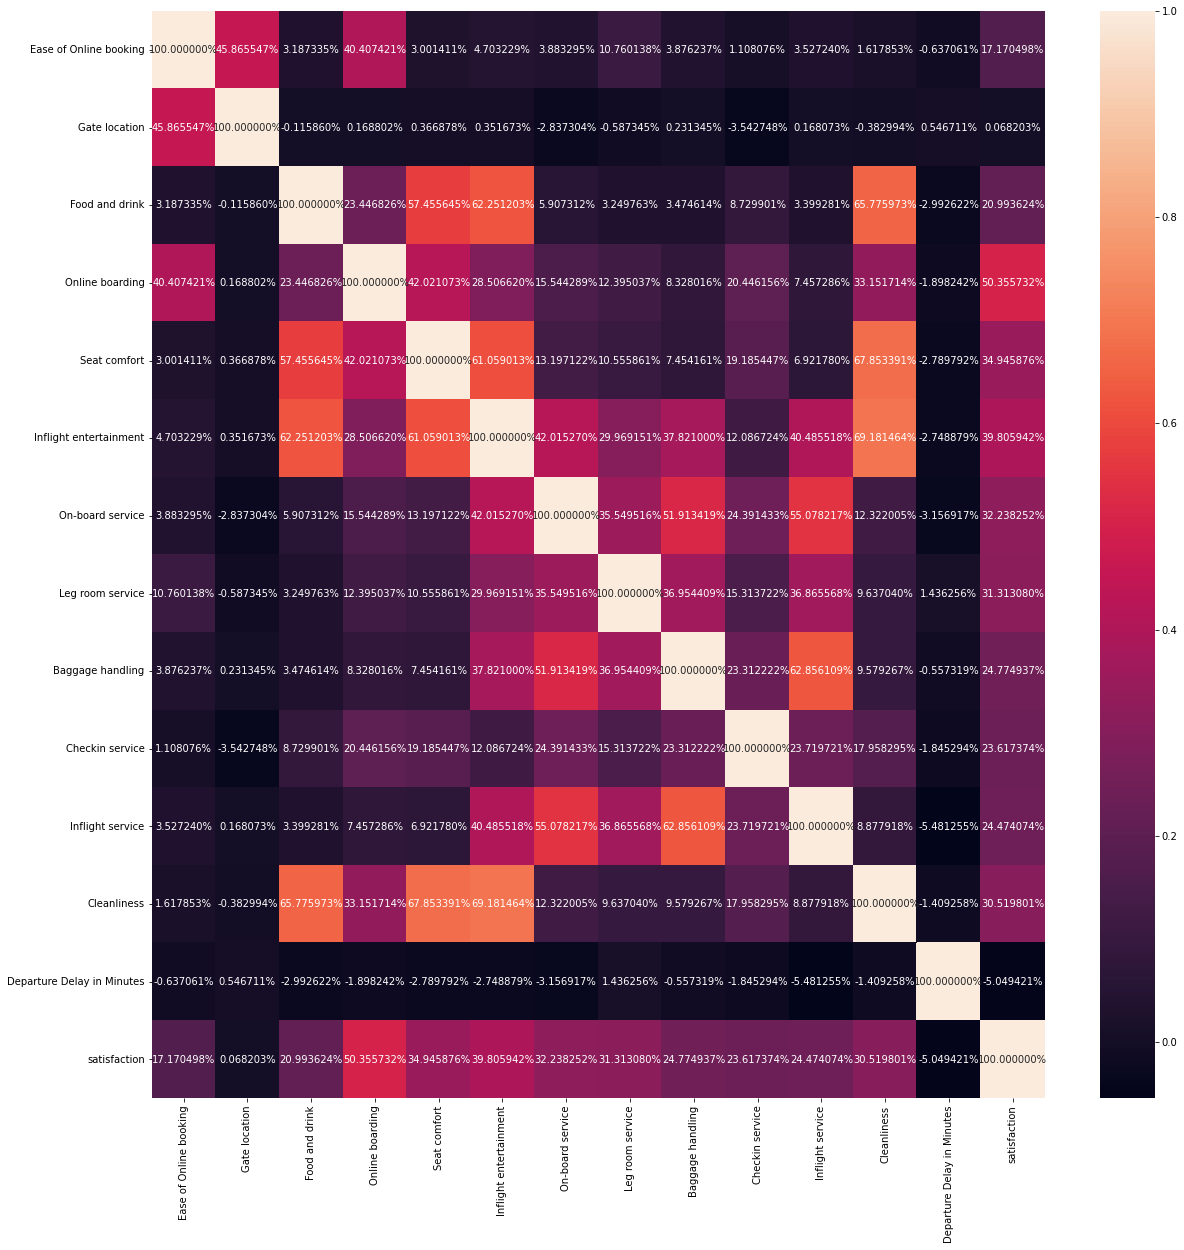

In [61]:
#visualise the corelation
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,10:24].corr(), annot= True, fmt='0%')

In [62]:
#Split the data into independent (X) and dependent (Y) data sets
X = df.iloc[:,1:23].values
Y = df.iloc[:,23].values

In [63]:
df.iloc[:,1:23].columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')

In [64]:
#X.info()

In [65]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [66]:
#scale the data (feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [67]:
#create a function for the models
def models(X_train, Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=42)
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
    tree.fit(X_train, Y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42)
    forest.fit(X_train, Y_train)
    
    #Print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [68]:
#getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.8752951442357048
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9972667077302125


In [69]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    print ('Model', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
    print()

Model 0
[[13337  1340]
 [ 1844  9455]]
Testing Accuracy =  0.8774253156760087

Model 1
[[14001   676]
 [  690 10609]]
Testing Accuracy =  0.9474129966122574

Model 2
[[14359   318]
 [  792 10507]]
Testing Accuracy =  0.9572682476131814



In [70]:
#another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
    print ('Model', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print()
    

Model 0
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14677
           1       0.88      0.84      0.86     11299

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976

0.8774253156760087

Model 1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14677
           1       0.94      0.94      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

0.9474129966122574

Model 2
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14677
           1       0.97      0.93      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted a

In [71]:
#print the prediction of the random forest classifier model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[0 0 0 ... 1 0 0]

[0 0 0 ... 1 0 0]


In [72]:
import joblib

In [73]:
joblib.dump(model,'model_joblib.sav')

['model_joblib.sav']

In [74]:
model=joblib.load('model_joblib.sav')

In [75]:
model

(LogisticRegression(random_state=42),
 DecisionTreeClassifier(criterion='entropy', random_state=42),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42))

In [76]:
#input_data1 =(70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,25,18)
#input_data_array1 = np.asarray(input_data1)
#input_data_reshaped1 = input_data_array1.reshape(1,-1)
#prediction1 = model[2].predict(input_data_reshaped1)

In [77]:
#unsatisfied
#print(int(prediction1))

In [78]:
#input_data1 =(1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,5,5,5,5,5,0,0.0)
#input_data_array1 = np.asarray(input_data1)
#input_data_reshaped1 = input_data_array1.reshape(1,-1)
#prediction2 = model[2].predict(input_data_reshaped1)

In [79]:
#satisfied
#print(int(prediction1))

In [80]:
#df